
# <strong>Content</strong>
- Motivation
- Dataset Description
- Analysis Plan
- Performance Metrics
- Exploratory Data Analysis
- Exploratory Data Analysis Summary
- Model Development
- Conclusion
- References



#  Motivation


<p>Regarding to the high prices of new and modern vehicules, second hand ones are more in demand now more than ever and most of the people tend to buy used cars,but when they come to estimate the best price to pay they find some diffuclties.So to make both the seller's and the customer's life easier, in this project we will create a model that predict and estimates the best price for used BMW cars and get an insight about the factors that affect the car pricing </p>

##  Dataset Description 
<p>BMW Used Car Sales dataset has been provided by DataCamp and can be found on <a href="https://github.com/datacamp/careerhub-data/blob/master/BMW%20Used%20Car%20Sales/README.md#bmw-used-car-sales">Datacamp Career Hub on Github</a></p>


###  Data Description
<p>The data consists of 8 features and one target variable, price.</p>

#### Feature Variables 

| Feature | Description | Type |
| --- | --- | --- |
| model | Model name of the automobile | categorical |
|year	|Model year of the automobile|	ordinal|
|transmission|	Transmission type of the automobile|	categorical|
|mileage|	The distance the automobile has traveled in miles	|numerical|
|fuelType|	Whether the automobile runs on petrol or diesel|	categorical|
|tax	|Road tax of the automobile|	numerical|
|mpg	|Fuel consumption of the automobile (miles per gallon)	|numerical|
|engineSize|	Volume of the engine of the automobile in liter|	ordinal|


#### Target Variable



|Target|Description|Type|
| --- | --- | --- | 
|price            |Selling price of the car |numerical|



#  Analysis Plan
<p>This is a supervised, unidemensional regression problem which predict the selling price of a used car as a numerical value depending of different features.<br>
The following steps will be followed</p>

1. Identify possible suitable performance metrics to measure the success of the analysis.
2. Apply exploratory data analysis to get insights about the data and detect problems in the dataset. 
3. Select a suitable algorithm for model training to predict the data points out of the dataset. 
4. Provide discussions about the ways to improve the model. 


#  Performance Metrics 
The target variable is a numerical continuous value. Mean Absolute Error (MAE) and Root mean squared error (RMSE) are two of the most common metrics used to measure accuracy for this type of variables. To measure the accuracy of the prediction of the model, an appropriate performance metric should be selected. Mean squared error or mean absolute error could be used for this purpose.

#### Mean Absolute Error (MAE)
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.


<img src="https://miro.medium.com/max/394/1*OVlFLnMwHDx08PHzqlBDag.gif"/>

#### Root Mean Squared Error (RMSE)
RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.
<img src="https://miro.medium.com/max/409/1*9hQVcasuwx5ddq_s3MFCyw.gif" />

Difference between RMSE and MAE is that RMSE behaves relatively more punishing than MAE as it root squares the error values. MAE is more robust when there are extreme high or extreme low values in the dataset.


#  Exploratory Data Analysis

In this section, an initial exploratory analysis of the dataset will be done. The dataset will be
evaluated for any data quality problems that have to be resolved.

- Let's begin with importing needed modules for the analysis:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings,time
from scipy import stats
warnings.filterwarnings("ignore")

### Loading The Data:

- Loading data from github. 
- Checking for missing values.
- Correcting data types of the features.
- Checking for and droping  duplicates. 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datacamp/careerhub-data/master/BMW%20Used%20Car%20Sales/bmw.csv')
data.head()

In [4]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


- The dataset consists of 10781 entries and 9 Features with no missing data. 
- The data is large enough to get accurate results from the analysis.
- Features with data type "object" should be reassigned to "category" and features <strong>price</strong> and <strong>mileage</strong> to "float64" and feature <strong>mpg</strong> to "int64".

In [7]:
data.model = data.model.astype("category")
data.transmission = data.transmission.astype("category")
data.fuelType = data.fuelType.astype("category")

data.price = data.price.astype("float64")
data.mileage = data.mileage.astype("float64")

data.mpg = data.mpg.astype("int64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         10781 non-null  category
 1   year          10781 non-null  int64   
 2   price         10781 non-null  float64 
 3   transmission  10781 non-null  category
 4   mileage       10781 non-null  float64 
 5   fuelType      10781 non-null  category
 6   tax           10781 non-null  int64   
 7   mpg           10781 non-null  int64   
 8   engineSize    10781 non-null  float64 
dtypes: category(3), float64(3), int64(3)
memory usage: 538.2 KB


In [8]:
data.duplicated().sum()

117

- The dataset consist of 117 duplicate rows that should be dropped.

In [9]:
data = data.drop_duplicates().reset_index(drop=True)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200.0,Automatic,67068.0,Diesel,125,57,2.0
1,6 Series,2018,27000.0,Automatic,14827.0,Petrol,145,42,2.0
2,5 Series,2016,16000.0,Automatic,62794.0,Diesel,160,51,3.0
3,1 Series,2017,12750.0,Automatic,26676.0,Diesel,145,72,1.5
4,7 Series,2014,14500.0,Automatic,39554.0,Diesel,160,50,3.0
...,...,...,...,...,...,...,...,...,...
10659,X3,2016,19000.0,Automatic,40818.0,Diesel,150,54,2.0
10660,5 Series,2016,14600.0,Automatic,42947.0,Diesel,125,60,2.0
10661,3 Series,2017,13100.0,Manual,25468.0,Petrol,200,42,2.0
10662,1 Series,2014,9930.0,Automatic,45000.0,Diesel,30,64,2.0



- Now the dataset consists of 10664 entries with no duplicates nor missing values.
- We will try to strip the leading space in <strong>model</strong> column to prevent the recurrence of its categories. 

In [10]:
data.model = data.model.apply(lambda x: x.strip())

### Data Exploration with Plots and Graphs:

- Profiling the dataset to obtain high understanding of the data. 
- Visualizing the target variable distribution.
- Visualizing features vs target variable to get intuition.
 


In [11]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,2017.062828,22692.888691,25710.978995,131.597431,55.980589,2.170161
std,2.350668,11434.921030,25146.634940,61.611394,31.442352,0.552556
min,1996.000000,1200.000000,1.000000,0.000000,5.000000,0.000000
25%,2016.000000,14897.000000,5665.750000,135.000000,45.000000,2.000000
50%,2017.000000,20261.500000,18783.000000,145.000000,53.000000,2.000000
75%,2019.000000,27890.000000,38436.500000,145.000000,62.000000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.000000,6.600000


- The oldest car in the dataset is from 1996 and The latest car is from 2020.
- The average price of each used car is 22692.888691<span>&#36;</span> and The most expensive car price is 123456<span>&#36;</span> and the cheapest car price is 1200<span>&#36;</span>.
- Road tax varies from 0<span>&#36;</span> to 580<span>&#36;</span> per car.
- The highest mpg is 470.8, which is quite large and requires further investigation.
- The lowest mileage is 1 mile and highest mileage is 214000 miles.
- Engine Size varies from 0 to 6.6L.
- From this table it seems that there are outliers in the data with wide ranges and relatively low standard deviations, we will check with help of boxplots .


In [14]:
for col in data.select_dtypes(include=['category']).columns:
    print()
    print(f" There are {len(list(data[col].cat.categories))} Categories in {col} feature: ",end="\n'")
    print(*list(data[col].cat.categories),sep="' - '",end="'\n")
    


 There are 24 Categories in model feature: 
'1 Series' - '2 Series' - '3 Series' - '4 Series' - '5 Series' - '6 Series' - '7 Series' - '8 Series' - 'M2' - 'M3' - 'M4' - 'M5' - 'M6' - 'X1' - 'X2' - 'X3' - 'X4' - 'X5' - 'X6' - 'X7' - 'Z3' - 'Z4' - 'i3' - 'i8'

 There are 3 Categories in transmission feature: 
'Automatic' - 'Manual' - 'Semi-Auto'

 There are 5 Categories in fuelType feature: 
'Diesel' - 'Electric' - 'Hybrid' - 'Other' - 'Petrol'


In [15]:
data.describe(include='category')

,model,transmission,fuelType
count,10664,10664,10664
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2434,4637,6988


<AxesSubplot:ylabel='price'>

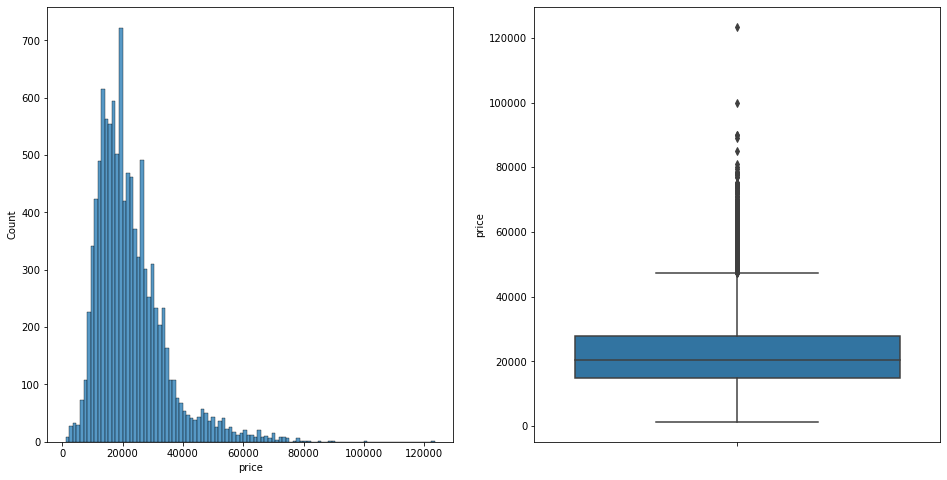

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data=data,x='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,y='price')

- The histogram shows us that the distribution of the price is right skewed which indicates that there are some outliers, and from the boxplot we see that there are outliers with too high prices.

In [17]:
price_iqr = stats.iqr(data.price)
data_new  = data[data.price< data.price.describe()["75%"]+ price_iqr * 1.5]
data_new.describe()

,year,price,mileage,tax,mpg,engineSize
count,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000
mean,2016.967112,21053.674062,26697.363735,130.967995,56.827803,2.128775
std,2.358161,8537.921927,25286.160487,62.866329,31.492755,0.518562
min,1996.000000,1200.000000,1.000000,0.000000,5.000000,0.000000
25%,2016.000000,14500.000000,6187.250000,125.000000,47.000000,2.000000
50%,2017.000000,19889.000000,20358.500000,145.000000,53.000000,2.000000
75%,2019.000000,26580.000000,39834.500000,145.000000,62.000000,2.000000
max,2020.000000,47250.000000,214000.000000,580.000000,470.000000,5.000000


- 478 outliers  removed from the datasets

In [18]:
data_new.model.value_counts()

3 Series    2430
1 Series    1962
2 Series    1187
5 Series    1050
4 Series     984
X1           797
X3           522
X5           290
X2           261
X4           170
6 Series     107
Z4           106
M4            83
7 Series      68
X6            58
i3            43
M3            24
M2            17
M5             8
M6             8
Z3             7
i8             4
8 Series       0
X7             0
Name: model, dtype: int64

- 8 Series and X7 are not well  represented in the dataset without outliers, so removing outiliers in each model will be better approach.

In [19]:
price_outliers = pd.DataFrame(columns = data.columns)

for model in data.model.unique():
    model_df = data[data.model == model]
    model_price_iqr = stats.iqr(model_df.price.to_numpy())
    model_df_outliers = model_df[(model_df.price > model_df.price.describe()["75%"] + model_price_iqr * 1.5) |(model_df.price < model_df.price.describe()["25%"] - model_price_iqr * 1.5)]
    price_outliers = price_outliers.append(model_df_outliers)

data_new2 = data[~data.isin(price_outliers)]

print("Number of Outliers Eliminated: ", len(price_outliers))
data_new2.groupby("model").count()["price"]


Number of Outliers Eliminated:  64


model
1 Series    1942
2 Series    1176
3 Series    2428
4 Series     980
5 Series    1050
6 Series     107
7 Series     106
8 Series      37
M2            19
M3            26
M4           119
M5            29
M6             7
X1           795
X2           257
X3           547
X4           177
X5           464
X6           106
X7            55
Z3             6
Z4           107
i3            43
i8            17
Name: price, dtype: int64

- The outliers for each model are eliminated, now we can see the relationship between the price and other features. 

<AxesSubplot:xlabel='model', ylabel='price'>

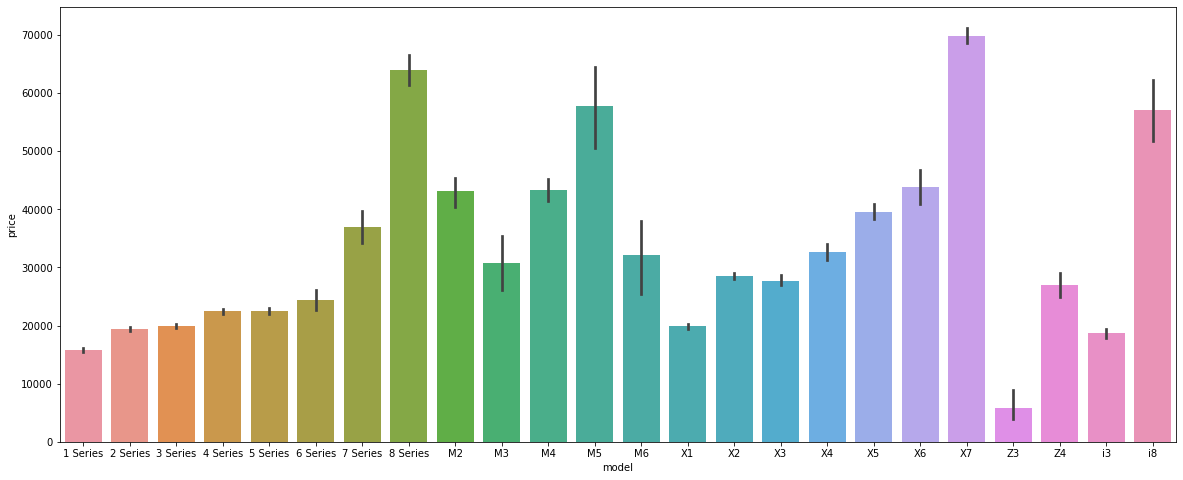

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(data=data,x='model',y='price')

- The highest average price among cars' models in our dataset is <bold>X7</bold> with average price of 69842.76<span>&#36;</span>. 

In [17]:
YearModel=data.groupby('model')['price'].agg(['count','sum','mean']).sort_values(['count'],ascending=False).reset_index()
YearModel = YearModel.rename(columns ={ 'sum':'Total','count':'CarsSold','mean':'MeanPrices'},inplace=False)
YearModel

,model,CarsSold,Total,MeanPrices
0,3 Series,2434,48319016.0,19851.691044
1,1 Series,1962,31021007.0,15810.910805
2,2 Series,1188,23101070.0,19445.345118
3,5 Series,1051,23643594.0,22496.283539
4,4 Series,986,22127788.0,22441.975659
5,X1,797,15809263.0,19835.963614
6,X3,550,15258389.0,27742.525455
7,X5,464,18355595.0,39559.471983
8,X2,261,7445497.0,28526.808429
9,X4,177,5775641.0,32630.740113


- The model with the most cars sold is <bold>3 Series</bold> with 2434 cars sold with an average price of 19851.69<span>&#36;</span>.

<AxesSubplot:xlabel='year', ylabel='price'>

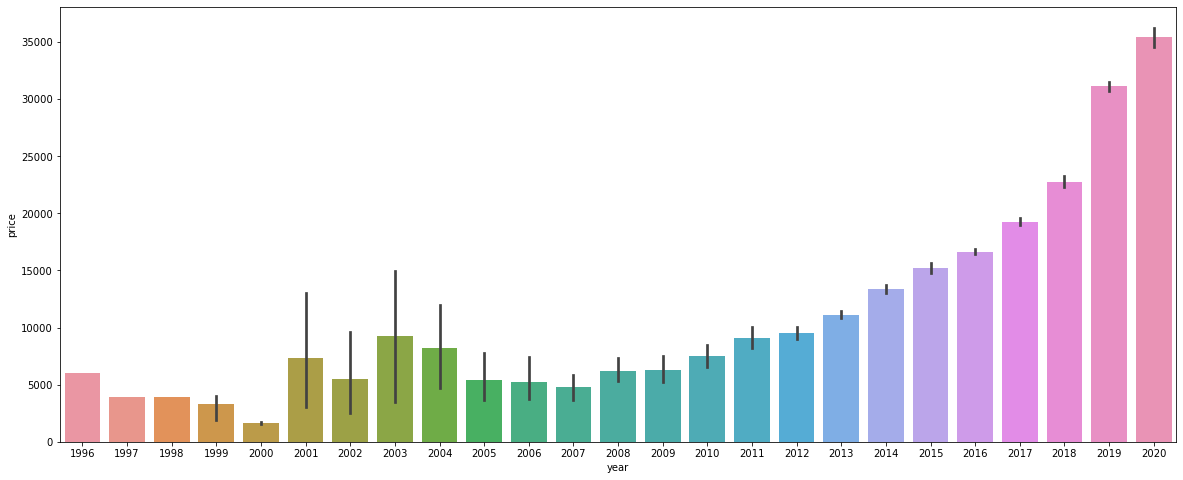

In [18]:
plt.figure(figsize=(20,8))
sns.barplot(data=data,x='year',y='price')

- The year model with the highest average price is <bold>2020</bold>'s cars with average price of 35400.32<span>&#36;</span>. 

In [19]:
YearPrices=data.groupby('year')['price'].agg(['sum','count','mean']).sort_values(['count'],ascending=False).reset_index()
YearPrices = YearPrices.rename(columns ={ 'sum':'Total','count':'CarsSold','mean':'MeanPrices'},inplace=False)
YearPrices

,year,Total,CarsSold,MeanPrices
0,2019,105657839.0,3396,31112.437868
1,2016,31230984.0,1877,16638.776771
2,2017,33106909.0,1718,19270.610594
3,2015,14005683.0,921,15207.039088
4,2018,19230380.0,846,22730.945626
5,2020,25559032.0,722,35400.321330
6,2014,6640704.0,498,13334.746988
7,2013,3949278.0,355,11124.726761
8,2012,1134509.0,119,9533.689076
9,2011,464054.0,51,9099.098039


- We observe that the year model the most cars sold is 2019 with 3048 cars sold with an average price of 28154.62<span>&#36;</span> from different models, followed by recent years 2016, 2017, 2015, 2018 and 2020.

We will generate Pearson Correlation Coefficients to inspect the correlation of each feature with price.

Text(0.5, 1.0, 'Heatmap of Pearson Correlation Coefficients\n')

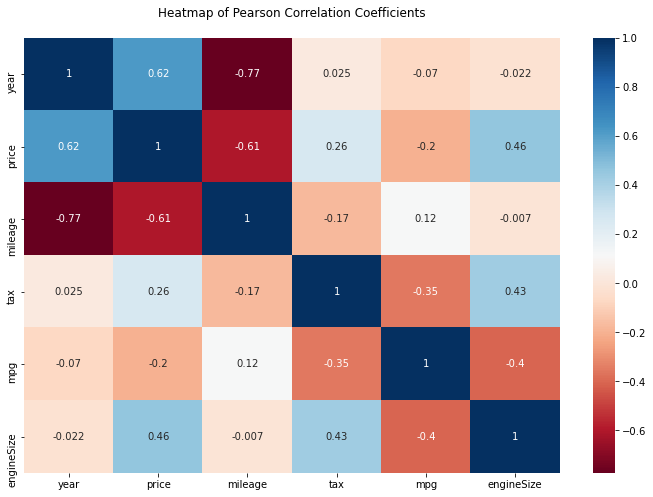

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data = data.corr(), annot = True, cmap = "RdBu").set_title("Heatmap of Pearson Correlation Coefficients\n", size = 12)

- The price is positively correlated with model year and engine size of the automobile.there is negative correlation between mileage and price. Road tax and fuel consumption does not seem to have a significant correlation with price.

# Exploratory Data Analysis Summary

The dataset is large enough  for the analysis with  10664 samples. There are no missing values but there are some duplicates needed to be removed, some outliers that could affect the model also removed and the 3 categorical features need to be encoded.
From the analysis the relationship between the target and the features have been inspected and there is a strong correlation between year, enginesize, mileage,model and price.




#  Model Development 

 A tree based regressor such as Random Forest would perform well with this dataset beacause it consists of both categorical and numerical features and the target value is a single numerical value.
 MAE and RMSE will be used to evaluate the performance of our models.
 For this problem we will use 3 initial models, Linear Regression as a fast baseline model, Random Forest Regression and Extreme Gradient Boosting Regressor.
To obtain a statistical result on Linear Regression,we will use statsmodels instead of scikit-learn.
 Before that, the data will be randomly shuffled and split into a training and validation set.
It also seems that the categorical features need some form of encoding, we will be using one-hot encoding, then we will
scale the numerical features with standard scaler. We will perform hyperparameters tuning  on the complex models with GridSearchCV to optimze them and find the best performing model, then we will evaluate our finding.

#### Importing needed packages

In [20]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.api as sm

from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error

#### Separating features from our target

In [22]:
y = data.price
X = data.drop(['price'],axis=1)

In [23]:
# Save the categorical features into a list
cat_columns = data.select_dtypes(include='category').columns
cat_columns

Index(['model', 'transmission', 'fuelType'], dtype='object')

#### Split the data into train and test data

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=0)
print(X_train.shape)
print(X_test.shape)

(8531, 8)
(2133, 8)


- Our data set is large enough and splited into train data tha consists of 8531 entries and test data with 2133 entries, they will be enough to fit our models and evaluate their performances.

#### Perform One Hot Encoding for categorical features on both train and test data

In [138]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#perform one hot encoding to categorical features
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_columns]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[cat_columns]))

# One-hot encoding removed index we will put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

#renaming columns 
OH_cols_train.columns = OH_encoder.get_feature_names(cat_columns)
OH_cols_test.columns = OH_encoder.get_feature_names(cat_columns)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(cat_columns, axis=1)
num_X_test = X_test.drop(cat_columns, axis=1)

OH_cols_train.shape

(8531, 32)

- After performing the one hot encoding to our categorical features, they transformed to 32 new columns insted of our 3 that will be droped and concatinating the new ones to the numerical features after scaling them. 

#### Scaling the numerical features 

In [123]:
scaler = StandardScaler()

# using a loop to standardize only the numeric columns
for col in num_X_train.columns:
    num_X_train[col] = scaler.fit_transform(num_X_train[[col]])
    num_X_test[col] = scaler.transform(num_X_test[[col]])             

- Now that our numerical values are standardized we will ad them to the one hot encoded features.

In [124]:
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_X_train.shape

(8531, 37)

- Our full train data and test data are with 37 columns after performing the One Hot Encoder and Scaling the numerical features.

In [128]:
OH_X_train.head()

,year,mileage,tax,mpg,engineSize,model_1 Series,model_2 Series,model_3 Series,model_4 Series,model_5 Series,...,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
9654,-2.167856,0.578544,1.093864,-0.473060,-0.304555,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10387,-0.028488,0.358559,-1.638455,0.285145,-0.304555,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9296,-0.884235,-0.164784,0.933139,-0.283508,1.508663,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3140,-1.312109,1.498261,0.450965,-0.157141,1.508663,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6314,0.399385,-0.931336,0.209878,-0.346692,-0.304555,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Perform  Regression Analysis

In [94]:
LR = sm.OLS(y_train, OH_X_train)
result_LR = LR.fit()
print(result_LR.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1578.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:31:14   Log-Likelihood:                -83264.
No. Observations:                8531   AIC:                         1.666e+05
Df Residuals:                    8496   BIC:                         1.668e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year        4171.7553     78.388     53.219      0.0


- From  the regression analysis above, most of the features has p-value smaller than 0.001. Therefore, all varaibles are important  to the prediction results and no feature selection is needed in our modeling.

#### Perform Extreme Gradient Boosting Regressor

In [89]:
XGBR_model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
param_grid_XGBR  =  {'n_estimators': [200,500,1000],
                     'learning_rate':[0.05,0.1,0.2],
                     'max_depth':[4,6,8]}
XGBR_GridSearchCV = GridSearchCV(estimator = XGBR_model,
                                 param_grid=param_grid_XGBR,
                                 scoring='neg_mean_absolute_error',
                                 n_jobs=4,
                                 cv=10,
                                 refit=True,
                                 return_train_score=True
                                )
start_fitting = time.time()
XGBR_GridSearchCV.fit(OH_X_train,y_train)
end_fitting = time.time()
runtime = (end_fitting-start_fitting)/60
print(f"Time took to fit all the models {round(runtime,2)} mins")

Time took to fit all the models 15.73 mins


In [157]:
pd.DataFrame(XGBR_GridSearchCV.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.390993,0.347983,0.011403,0.002586,0.05,4,200,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",-1712.045881,-1727.209109,...,-1693.665033,-1693.149175,-1694.440497,-1664.022061,-1683.319294,-1692.856940,-1687.438141,-1687.117332,-1689.572390,9.915816
1,7.688201,0.170500,0.011266,0.003977,0.05,4,500,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",-1556.466507,-1535.130991,...,-1419.027566,-1408.402554,-1412.277627,-1379.134654,-1396.871645,-1419.864088,-1407.646939,-1400.096942,-1408.893549,13.192955
2,14.972386,0.389539,0.014326,0.002273,0.05,4,1000,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",-1494.611466,-1456.784051,...,-1243.968697,-1230.328836,-1240.971332,-1215.217070,-1221.479896,-1239.966436,-1230.277800,-1236.763508,-1234.959766,9.879996
3,4.798737,0.127465,0.009540,0.000880,0.05,6,200,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",-1498.244252,-1535.526637,...,-1340.949824,-1338.511810,-1336.195635,-1310.054715,-1323.710322,-1330.301615,-1324.718576,-1325.118532,-1331.184107,9.940623
4,11.405032,0.167045,0.013047,0.001461,0.05,6,500,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",-1434.720385,-1416.166093,...,-1098.773073,-1084.216180,-1076.845843,-1042.393331,-1080.697689,-1083.190713,-1079.732621,-1074.891437,-1079.101797,13.756551


- The DataFrame above represents the cross-validation results from the Extreme Gradient Boosting regressor with hyperparameter tuning.

In [58]:
pd.DataFrame(XGBR_GridSearchCV.cv_results_)[pd.DataFrame(XGBR_GridSearchCV.cv_results_).rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
13,11.417856,0.331457,0.012032,0.002492,0.1,6,500,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",-1418.070649,-1428.435903,...,-854.30424,-834.929726,-833.212095,-825.43955,-841.239688,-829.170073,-841.74803,-848.408484,-840.997691,9.555873


- The row above represents the best performing model.

In [96]:
print("best hypermarameters to use are : ",XGBR_GridSearchCV.best_params_)

best hypermarameters to use are :  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


- From the grid search results we can define a new model to with the best hypermarameters  

In [97]:
best_XGBR_model = XGBR_GridSearchCV.best_estimator_
pred_XGBR = best_XGBR_model.predict(OH_X_test)
MAE_XGBR = mean_absolute_error(y_test,pred_XGBR)
RMSE_XGBR = mean_squared_error(y_test,pred_XGBR,squared=False)
print(f'Mean Absolute Error : \n{MAE_XGBR}\nRoot Mean Squared Error : {RMSE_XGBR}')
result_XGBR = pd.DataFrame(pred_XGBR,y_test).reset_index().rename(columns={'price':'actualPrice',0:'predictedPrice'})
result_XGBR["error"] = abs(result_XGBR.actualPrice-result_XGBR.predictedPrice)
result_XGBR.head(10)

Mean Absolute Error : 
1473.448092933222
Root Mean Squared Error : 2211.7815288907873


,actualPrice,predictedPrice,error
0,17350.0,16604.914062,745.085938
1,28888.0,28883.539062,4.460938
2,51988.0,49885.765625,2102.234375
3,26352.0,24774.812500,1577.187500
4,10600.0,10671.848633,71.848633
5,17541.0,16622.869141,918.130859
6,19980.0,23764.033203,3784.033203
7,34995.0,30274.542969,4720.457031
8,14015.0,12016.474609,1998.525391
9,21875.0,22698.392578,823.392578


#### Performing Linear Regression

In [70]:
LR_model = LinearRegression()
LR_model.fit(OH_X_train,y_train)

LinearRegression()

In [71]:
pred_LR = LR_model.predict(OH_X_test)
MAE_LR = mean_absolute_error(y_test,pred_LR)
RMSE_LR = mean_squared_error(y_test,pred_LR,squared=False)
print(f'Mean Absolute Error : \n{MAE_LR}\nMean Squared Error : {RMSE_LR}')
resultLR = pd.DataFrame(pred_LR,y_test).reset_index().rename(columns={'price':'actualPrice',0:'predictedPrice'})
resultLR["error"] = abs(resultLR.actualPrice-resultLR.predictedPrice)
resultLR.head(10)

Mean Absolute Error : 
2804.358362476106
Mean Squared Error : 4026.9272056849836


,actualPrice,predictedPrice,error
0,17350.0,16350.530837,999.469163
1,28888.0,24666.280220,4221.719780
2,51988.0,48888.723654,3099.276346
3,26352.0,25721.416076,630.583924
4,10600.0,11619.250385,1019.250385
5,17541.0,14985.540974,2555.459026
6,19980.0,23051.904450,3071.904450
7,34995.0,31273.612054,3721.387946
8,14015.0,11857.422447,2157.577553
9,21875.0,21219.345700,655.654300


#### Performing Random Forest Regressor

In [78]:
RF_model = RandomForestRegressor(random_state=10)

param_grid_RF = {'n_estimators':[10,50,100,200],
                'max_depth':[2,5,10,20]}

RF_GridSearchCV = GridSearchCV(estimator = RF_model,
                                 param_grid= param_grid_RF,
                                 scoring= 'neg_mean_absolute_error',
                                 n_jobs= 6,
                                 cv= 10,
                                 refit= True,
                                 return_train_score=True
                                )
start_fitting = time.time()
RF_GridSearchCV.fit(OH_X_train,y_train)
end_fitting = time.time()
runtime = (end_fitting-start_fitting)/60
print(f"Time took to fit all the models {round(runtime,2)} mins")



Time took to fit all the models 1.86 mins


In [82]:
pd.DataFrame(RF_GridSearchCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.145103,0.012946,0.008359,0.001682,2,10,"{'max_depth': 2, 'n_estimators': 10}",-4551.453307,-4729.875436,-4846.053114,...,-4738.109032,-4757.251240,-4652.722776,-4639.950087,-4612.824895,-4689.936659,-4588.606289,-4474.687566,-4667.800969,88.792707
1,0.672392,0.017858,0.015107,0.003969,2,50,"{'max_depth': 2, 'n_estimators': 50}",-4497.634361,-4709.845445,-4752.153458,...,-4629.087295,-4728.926239,-4623.324318,-4703.899655,-4678.989306,-4756.099243,-4639.947775,-4551.810430,-4676.476867,60.987220
2,1.375476,0.047563,0.025685,0.007083,2,100,"{'max_depth': 2, 'n_estimators': 100}",-4464.973669,-4660.809085,-4733.796458,...,-4604.070220,-4726.394164,-4645.839780,-4687.074764,-4678.471437,-4730.325750,-4646.754619,-4570.003217,-4668.131206,49.256374
3,2.688286,0.052668,0.042500,0.004547,2,200,"{'max_depth': 2, 'n_estimators': 200}",-4454.039725,-4658.882211,-4723.470029,...,-4591.195706,-4715.095557,-4645.319944,-4695.067904,-4694.893421,-4734.622160,-4659.242473,-4602.405717,-4671.930223,45.114060
4,0.265676,0.013467,0.009465,0.002019,5,10,"{'max_depth': 5, 'n_estimators': 10}",-2802.509266,-2766.257501,-2880.456373,...,-2875.917354,-2868.491154,-2808.206208,-2841.945018,-2914.567159,-2902.454097,-2891.858531,-2859.845371,-2872.807870,29.841223
5,1.282419,0.020473,0.018079,0.002515,5,50,"{'max_depth': 5, 'n_estimators': 50}",-2766.155304,-2752.398370,-2870.801108,...,-2865.257295,-2872.547127,-2810.874530,-2839.999333,-2858.792646,-2866.891115,-2854.976414,-2859.151354,-2856.082638,17.359899
6,2.658752,0.073780,0.032726,0.005271,5,100,"{'max_depth': 5, 'n_estimators': 100}",-2763.524277,-2752.698193,-2854.761065,...,-2853.422600,-2867.009336,-2811.995133,-2827.894708,-2842.420487,-2850.758541,-2845.570965,-2844.525155,-2847.483312,16.693371
7,5.441379,0.099144,0.055692,0.007903,5,200,"{'max_depth': 5, 'n_estimators': 200}",-2756.479078,-2766.714005,-2842.024763,...,-2846.192340,-2863.237565,-2815.326527,-2830.742671,-2845.871613,-2841.765315,-2844.027242,-2841.349631,-2846.305878,15.551351
8,0.459433,0.035688,0.010144,0.001903,10,10,"{'max_depth': 10, 'n_estimators': 10}",-1790.032374,-1878.546523,-1843.765073,...,-1569.514931,-1571.024407,-1552.849967,-1562.647815,-1589.874645,-1579.130533,-1582.957642,-1587.983083,-1574.190012,10.843973
9,2.198778,0.056773,0.022936,0.003233,10,50,"{'max_depth': 10, 'n_estimators': 50}",-1771.757264,-1815.192080,-1826.220473,...,-1557.147476,-1552.158230,-1538.406794,-1540.761771,-1558.926374,-1547.375155,-1551.322287,-1559.035827,-1550.114707,6.759928


In [85]:
RF_GridSearchCV.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [88]:
best_RF_model = RF_GridSearchCV.best_estimator_
pred_RF = best_RF_model.predict(OH_X_test)
MAE_RF = mean_absolute_error(y_test,pred_RF)
RMSE_RF = mean_squared_error(y_test,pred_RF,squared=False)
print(f'Mean Absolute Error : \n{MAE_RF}\nRoot Mean Squared Error : {RMSE_RF}')
result_RF = pd.DataFrame(pred_RF,y_test).reset_index().rename(columns={'price':'actualPrice',0:'predictedPrice'})
result_RF["error"] = abs(result_RF.actualPrice-result_RF.predictedPrice)
result_RF.head(10)

Mean Absolute Error : 
1553.9459203927875
Root Mean Squared Error : 2446.3649954671764


,actualPrice,predictedPrice,error
0,17350.0,17288.011917,61.988083
1,28888.0,30594.589611,1706.589611
2,51988.0,54558.810000,2570.810000
3,26352.0,25399.351440,952.648560
4,10600.0,12462.736122,1862.736122
5,17541.0,16694.984074,846.015926
6,19980.0,23040.255000,3060.255000
7,34995.0,32817.539000,2177.461000
8,14015.0,11698.668319,2316.331681
9,21875.0,24682.145000,2807.145000


#### Results of modelling

- From the three models above Extreme Gradient Boosting Regressor performed the best with a MAE: 1473.44, RMSE:2211.78, 500 estimators, 6 max depth and 0.1 learning rate, so we will select XGBoost Model as our final model.

#### Model Evaluation
  ##### evaluate XGBR predictions

In [103]:
result_XGBR['error'].describe()

count     2133.000000
mean      1473.448093
std       1649.910447
min          2.246094
25%        443.496094
50%       1008.066406
75%       1888.472656
max      19895.839844
Name: error, dtype: float64

- 25% of predicted prices are within <span>&#36;</span>0 to <span>&#36;</span>443.49 lower or higher than  actual prices.
- 50% of predicted prices are within <span>&#36;</span>0 to <span>&#36;</span>1008.06 lower or higher than  actual prices.
- 75% of predicted prices are within <span>&#36;</span>0 to <span>&#36;</span>1888.47 lower or higher than  actual prices.

##### feature importance

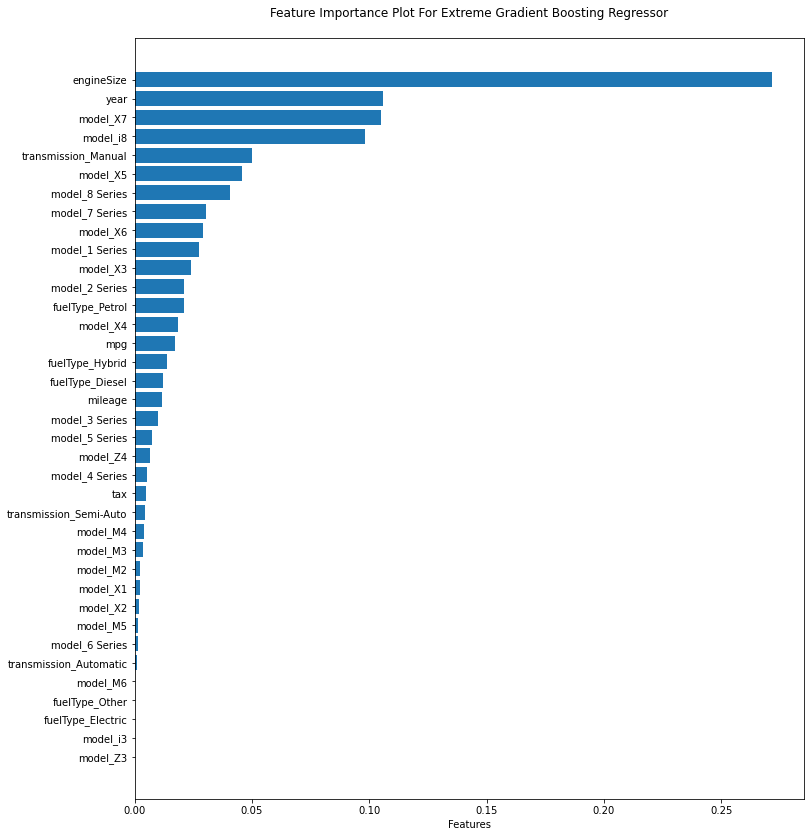

In [154]:
plt.figure(figsize=(12,14))
plt.barh(range(OH_X_train.shape[1]),best_XGBR_model.feature_importances_[np.argsort(best_XGBR_model.feature_importances_)], tick_label=OH_X_train.columns[np.argsort(best_XGBR_model.feature_importances_)])
plt.title('Feature Importance Plot For Extreme Gradient Boosting Regressor\n')
plt.xlabel('Features')
plt.show()

<!-- As the first goal of this project is to find the important features to predict the resale price of BMW used cars. -->

Based on the Extreme Gradient Boosting Regressor model, and the feature importance above the important features that affect the pricing of the cars are:

- **Engine Size**: from the plot it has the highest feature importance to predict the price of a car.It can be explained with  having a direct effect on the performance of a car as the lower engine size provides better mpg. 
- **Year** is the second-highest important feature.Clear that The latest the car, the more expensive it is.
- **Model** also have importance when we decide to price the car, from the plot model X7 and 8 Series have the highest importance because they have the highest average price among all the other models.



# Conclusion

- The main objectifs of this case study is to create and build a machine learning model to predict the best resale price for BMW used cars and find the features that affect this pricing.
- With the help of 2 key performances Mean absolute error and Root Mean Squared Error, It's recommended for this problem An Extreme Gradient boosting Regression model with MAE of  1473.44 and RMSE of nearly 2212
- To improve the performance of the model, adding new features to the datasets, feature engineering practices can be applied, a more specific grid search can be conducted or a different type of prediction model can be utilized.

# References

- https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
- https://s3.amazonaws.com/talent-assets.datacamp.com/case_study_sample.pdf
- https://campus.datacamp.com/courses/hyperparameter-tuning-in-python/hyperparameters-and-parameters?ex=1